#### Pandas Operations

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
# df = pd.read_csv('file_location')
df = sns.load_dataset('tips')

In [4]:
df.head() # top 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape

(244, 7)

In [7]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

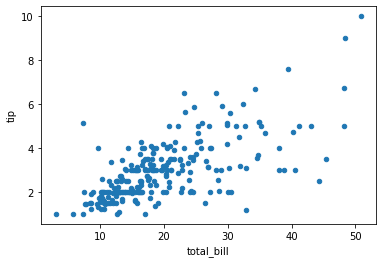

In [14]:
df[['total_bill', 'tip']].plot(kind='scatter', x="total_bill", y="tip")

In [18]:
df[df['total_bill']>=44] # filtering / Transform

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


## ETL

    Extract Data From Sources(kaggle, website, database, webscrapping, api)
    
    Transform Data to Structure format while cleaning data
    
                      Data Wrangling / Data Engineer
                      
                      Data Frame, Table, row, columns
                      
                      missing values 
                      
                      fix outliers
                      
                      human error / encoding error
                      
                      filtering also transformation
                      ...
                      
    Load Store data into warehouses, databases, files 

### Transformation

    converting one form of data to another form of data
    
    Tons of data can be tranformed into tons of data
    
    "1", "ab", "2", "4", "5", "6", "7"
              
              transform function

    1.00  np.nan, 2.00, 4.00, 5.00, 6.0, 7.0
    
    
    "good", "bad", "good", "bad", "awesome", "good", "avg"
    
             transform function [Ordinal Encoding ]
             
     4       2        4     2       5          4       3
    

### Aggregation


    tons of data but after aggregation we get most of the time single value
    which can represent entire data
    
    result -> mean, std, var, quantiles, ...

In [20]:
tips = sns.load_dataset('tips')

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

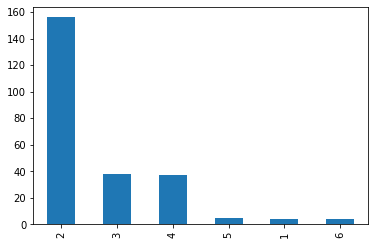

In [29]:
tips['size'].value_counts().plot(kind='bar')

In [28]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [27]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [26]:
tips['size'].nuniqueique()

6

In [25]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [24]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [22]:
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

<AxesSubplot:ylabel='total_bill'>

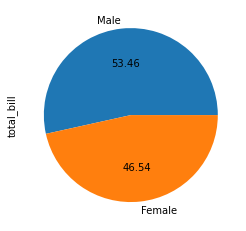

In [41]:
tips.groupby('sex')["total_bill"].mean().plot(kind='pie', autopct="%.2f")

#### Group By

In [44]:
tips.groupby('smoker')[["total_bill", "tip"]].mean()

,total_bill,tip
smoker,,
Yes,20.756344,3.008710
No,19.188278,2.991854


In [46]:
data = sns.load_dataset('titanic')

In [48]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [59]:
data.groupby(['survived', 'sex'])['pclass'].count().reset_index()

,survived,sex,pclass
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


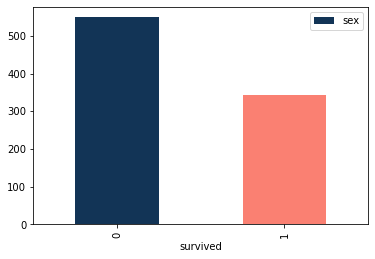

In [53]:
data.groupby('survived')['sex'].count().plot(kind='bar', color=['#123456','salmon'])
plt.legend()
plt.show()

In [60]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
np.random.seed(121)
# always generate random no using seed 121 means same random data always

In [86]:
df = pd.DataFrame({
    "gender": np.random.choice(["male", "female"], 20),
    "salary": np.random.randint(20, 80, 20),
    "age": np.random.randint(20, 25, 20)
})
df.head(5)

,gender,salary,age
0,male,50,24
1,male,40,20
2,female,27,20
3,female,32,22
4,male,58,20


In [87]:
g1 = df[df['gender'] == 'female']
g2 = df[df['gender']=='male']

In [88]:
rd = pd.DataFrame({
    "female": [g1['salary'].mean()],
    "male": [g2['salary'].mean()]
})
rd

,female,male
0,35.333333,47.5


In [90]:
df.groupby('gender').groups

{'female': [2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19], 'male': [0, 1, 4, 5, 6, 16, 17, 18]}

In [94]:
df.loc[df.groupby('gender').groups["male"]]

,gender,salary,age
0,male,50,24
1,male,40,20
4,male,58,20
5,male,50,23
6,male,70,20
16,male,64,22
17,male,21,22
18,male,27,24


In [98]:
df.groupby('gender').mean()

,salary,age
gender,,
female,35.333333,22.500
male,47.500000,21.875


In [101]:
df.groupby('gender').agg({
    "salary": ["mean", "median", "std"],
    "age": ["median", lambda v: v.sum(), 'count']
})

salary                      age                 
             mean median        std median <lambda_0> count
gender                                                     
female  35.333333     30  17.232809     23        270    12
male    47.500000     50  17.237832     22        175     8

In [103]:
df.groupby(["gender", "age"]).mean()

salary
gender age           
female 20   43.500000
       21   20.000000
       22   52.000000
       23   26.666667
       24   33.250000
male   20   56.000000
       22   42.500000
       23   50.000000
       24   38.500000

In [106]:
def change(v):
    if v == 'male': 
        return 1
    return 0
df['num_gen'] = df['gender'].apply(change)

In [107]:
df

,gender,salary,age,num_gen
0,male,50,24,1
1,male,40,20,1
2,female,27,20,0
3,female,32,22,0
4,male,58,20,1
5,male,50,23,1
6,male,70,20,1
7,female,29,23,0
8,female,31,23,0
9,female,20,23,0


    outlier
    
    median+-1.5IQR  we replace them with median value

In [122]:
df.iloc[[3, 7], 1] = [1120, 1150]

In [124]:
mu = df['salary'].median()
Q1, Q3 = df['salary'].quantile([0.25, 0.75])
IQR = Q3-Q1

min_ = mu - IQR
max_ = mu + IQR

In [126]:
df[ (df['salary']<min_)|(df['salary']>max_)]

,gender,salary,age,num_gen
3,female,1120,22,0
7,female,1150,23,0


    we can fix by median value
    we can fix using range values between center + dispersion

In [127]:
mu = df['salary'].median()
Q1, Q3 = df['salary'].quantile([0.25, 0.75])
IQR = Q3-Q1

min_ = mu - IQR
max_ = mu + IQR

In [130]:
def fix_outliers(value):
    if value < min_ or value > max_:
        return mu
    return value

In [133]:
df['sal_pr'] = df['salary'].apply(fix_outliers)

In [135]:
df.head()

,gender,salary,age,num_gen,sal_pr
0,male,50,24,1,50.0
1,male,40,20,1,40.0
2,female,27,20,0,27.0
3,female,1120,22,0,45.0
4,male,58,20,1,58.0


# pivot table

In [140]:
df.pivot_table(index='age', values=["salary", "sal_pr"], aggfunc='mean')

,sal_pr,salary
age,,
20,51.0,51.00
21,20.0,20.00
22,50.5,319.25
23,36.5,312.75
24,35.0,35.00


In [141]:
fl = sns.load_dataset('flights')

In [143]:
fl.head() # Long Format # rows >>> ncols

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [144]:
d = fl.pivot_table(index='month', columns='year',
                  values='passengers')

In [146]:
d.style.background_gradient() # cmap="PuBu"

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [147]:
d.style.background_gradient(cmap='binary') # cmap="PuBu"

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [148]:
d.style.background_gradient(cmap='rainbow') # cmap="PuBu"

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [149]:
d.style.background_gradient(cmap='coolwarm') # cmap="PuBu"

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [180]:
tr = pd.DataFrame({
    'year': list(d.columns),
    'Dec': list(d.loc['Dec'].values)
})

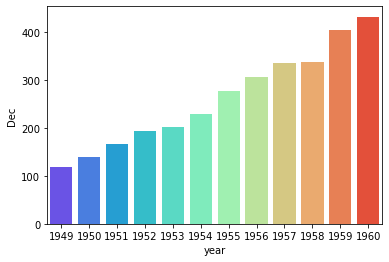

In [188]:
sns.barplot(x='year', y='Dec', data=tr, palette='rainbow')
plt.show()

    JOIN